### Análisis de Noticias Falsas y Reales en Español

#### Introducción
Este notebook está diseñado para procesar, analizar y visualizar datos de noticias falsas y reales en español. Se basa en una combinación de bases de datos generadas a partir de scraping y otras fuentes. El objetivo principal es realizar un preprocesamiento exhaustivo de los datos, preparar las características textuales, y generar visualizaciones que permitan entender mejor la distribución de las noticias, sus fuentes y características textuales. Finalmente, los datos procesados serán guardados en un archivo `csv` limpio para su posterior uso en modelos de machine learning.

#### Objetivos
1. **Descarga y procesamiento de datos**: Se descargan varias bases de datos de noticias en español, incluyendo noticias reales y falsas. Los datos se limpian y combinan en un único DataFrame.
2. **Preprocesamiento de texto**: Se preprocesa el texto eliminando caracteres no deseados, realizando lematización y eliminando stopwords.
3. **Análisis exploratorio de datos**: Se generan varias visualizaciones que permiten entender la distribución de las noticias y características textuales, como:
   - Distribución de noticias falsas vs reales.
   - Principales fuentes de noticias.
   - Distribución de la longitud de los textos (número de caracteres).
   - Nubes de palabras para noticias falsas y reales.
4. **Exportación de datos procesados**: Se guarda un archivo `CSV` que contiene los datos procesados y listos para ser utilizados en modelos de clasificación de noticias falsas y clickbait.

#### Pasos detallados
1. **Cargar y preprocesar los datos**: Se descargan varios datasets en formato CSV desde diferentes fuentes, incluyendo scraping de páginas web, y se realizan las siguientes operaciones:
   - Renombrar columnas.
   - Limpiar datos faltantes.
   - Combinar las bases de datos en un único DataFrame.

2. **Preprocesamiento del texto**: 
   - Se eliminan caracteres especiales no alfabéticos.
   - Se convierten todos los textos a minúsculas.
   - Se realiza la lematización utilizando la biblioteca `spacy` en español.
   - Se eliminan stopwords utilizando el conjunto de stopwords en español de `nltk`.

3. **Exploración de los datos**: 
   - **Distribución de categorías**: Se genera un gráfico de barras para mostrar el número de noticias falsas y reales.
   - **Distribución de fuentes**: Se genera un gráfico de las principales fuentes de noticias.
   - **Longitud de textos**: Se calcula y visualiza la longitud de los textos en términos de caracteres, comparando noticias falsas y reales.
   - **Nubes de palabras**: Se generan nubes de palabras para identificar las palabras más comunes tanto en noticias falsas como en noticias reales.

4. **Exportación de datos**: El DataFrame final, después del procesamiento, se guarda en un archivo `CSV` llamado `fake_news_clean.csv` para ser utilizado en futuros modelos de clasificación o análisis.


In [2]:
import pandas as pd
import warnings
import spacy
import nltk
import re 

In [3]:
# Cargar y preprocesar datos
df1 = pd.read_csv("hf://datasets/mariagrandury/fake_news_corpus_spanish/test.csv")
df2 = pd.read_csv("https://huggingface.co/datasets/sayalaruano/FakeNewsCorpusSpanish/raw/main/train.csv")
df3 = pd.read_csv('https://drive.google.com/uc?export=download&id=16925KI3IS1_IajpDS65VR8gInzWsQ1ZR')

c:\Users\eslab\anaconda3\envs\verifake_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df1.head(2)

,ID,CATEGORY,TOPICS,SOURCE,HEADLINE,TEXT,LINK
0,1,True,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,2,False,Política,El matinal,El Gobierno podrá acceder a las IPs de los móv...,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...


In [5]:
df2.head(2)

,Id,Category,Topic,Source,Headline,Text,Link
0,1,Fake,Education,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...
1,2,Fake,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...


In [6]:
df3.head(2)

,Id,Category,Topic,Source,Headline,Text,Link
0,1,Fake,Education,El Ruinaversal,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http://www.elruinaversal.com/2017/06/04/maestr...
1,2,True,Education,Heraldo,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https://www.heraldo.es/noticias/sociedad/2017/...


In [7]:
# Renombrar columnas y procesar texto
for df in [df1, df2, df3]:
    df.rename(columns={"ID": "Id", "CATEGORY": "Category", "TOPICS": "Topic", "SOURCE": "Source", "HEADLINE": "Headline", "TEXT": "Text", "LINK": "Link"}, inplace=True)
    df['Category'].replace({'Fake': False, 'True': True, 'False': False}, inplace=True)
    df['Category'] = df['Category'].map({True: 1, False: 0})

C:\Users\eslab\AppData\Local\Temp\ipykernel_37864\1308117329.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].replace({'Fake': False, 'True': True, 'False': False}, inplace=True)
C:\Users\eslab\AppData\Local\Temp\ipykernel_37864\1308117329.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [8]:
# Combinar los dataframes
df_combined = pd.concat([df1, df2, df3])

In [9]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 0 to 294
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        1543 non-null   int64 
 1   Category  1543 non-null   int64 
 2   Topic     1543 non-null   object
 3   Source    1536 non-null   object
 4   Headline  1471 non-null   object
 5   Text      1543 non-null   object
 6   Link      1540 non-null   object
dtypes: int64(2), object(5)
memory usage: 96.4+ KB


In [10]:
df_combined.value_counts()

Id   Category  Topic          Source          Headline                                                                                                     Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [11]:
# Limpiar datos faltantes
df_combined['Headline'].fillna(df_combined['Text'].apply(lambda x: ' '.join(x.split()[:10])), inplace=True)
df_combined.dropna(subset=['Source'], inplace=True)
df_combined['Link'].fillna('Unknown', inplace=True)

C:\Users\eslab\AppData\Local\Temp\ipykernel_37864\1114374163.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['Headline'].fillna(df_combined['Text'].apply(lambda x: ' '.join(x.split()[:10])), inplace=True)
C:\Users\eslab\AppData\Local\Temp\ipykernel_37864\1114374163.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [12]:
df_combined.head(3)

,Id,Category,Topic,Source,Headline,Text,Link
0,1,1,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,2,0,Política,El matinal,El Gobierno podrá acceder a las IPs de los móv...,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...
2,3,1,Política,El País,La comunidad musulmana catalana denuncia a Vox...,Las tres federaciones que agrupan al 90% de la...,https://elpais.com/espana/elecciones-catalanas...


In [13]:
df_combined.isnull().sum()

Id          0
Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

In [14]:
df_combined.duplicated().sum()

0

In [15]:
df_google_news = pd.read_csv('../data/real_news.csv')
df_concat = pd.read_csv('../data/google_scrap.csv')
df_more = pd.read_csv('../data/more.csv')
df_news = pd.read_csv('../data/news.csv')
df_real_news_google = pd.read_csv('../data/real_news_google.csv')
df_real_news = pd.read_csv('../data/real_news.csv')

In [16]:
df_concat = pd.concat([df_google_news, df_concat, df_more, df_news, df_real_news_google, df_real_news])

In [17]:
df_concat.value_counts()

query             position  title                                                                                                              body                                                                                                                                              posted           source                    link                                                                                                                                                          
para              36        Andalucía destinará en su presupuesto de 2025 casi 6.700 millones para el \ntejido productivo                      La consejera de Economía, Hacienda y Fondos Europeos de la Junta de \nAndalucía, Carolina España, anuncia que los Presupuestos autonómicos ...    hace 51 minutos  El Economista             https://www.eleconomista.es/economia/noticias/13042723/10/24/andalucia-destinara-en-su-presupuesto-de-2025-casi-6700-millones-para-el-tejido-productivo.html      2
             

In [18]:
df_concat.isnull().sum()

query        0
position     0
title        3
body        79
posted      79
source       3
link         0
dtype: int64

In [19]:
df_concat.duplicated().sum()

308

In [20]:
df_concat = df_concat.drop_duplicates()
df_concat = df_concat.dropna()

In [21]:
df_concat.shape

(831, 7)

In [22]:
# Renombrar columnas
df_concat = df_concat.rename(columns={'title': 'Headline', 'body': 'Text', 'link': 'Link'})

# Añadir columna 'Category' con valor 1 en todas las filas
df_concat['Category'] = 1

# Verificar los cambios
df_concat.head()

,query,position,Headline,Text,posted,source,Link,Category
0,para,1,"Muriqi, un regreso perfecto para un Mallorca q...",El 'pirata' volvió al equipo tras un mes de le...,hace 20 minutos,Marca.com,https://www.marca.com/futbol/mallorca/2024/10/...,1
1,para,2,Intervienen en Chiclana una red de grandes dim...,La Policía autonómica ha rescatado a una docen...,hace 30 minutos,Diario de Cádiz,https://www.diariodecadiz.es/chiclana/intervie...,1
2,para,3,Jota Jordi suelta esta bomba en directo para h...,El tertuliano del Chiringuito está tan seguro ...,hace 3 horas,Diario AS,https://as.com/futbol/videos/jota-jordi-suelta...,1
7,para,8,El referéndum en Moldavia para blindar la vía ...,Moldavia denuncia un ataque “sin precedentes” ...,hace 14 horas,EL PAÍS,https://elpais.com/internacional/2024-10-20/el...,1
8,para,9,Adiós al transporte público gratuito para todo...,El descuento en el transporte público finaliza...,hace 5 horas,20Minutos,https://www.20minutos.es/lainformacion/economi...,1


In [23]:
# Renombrar columnas para concatenar ambos datasets
df_concat = df_concat[['Headline', 'Text', 'Link', 'Category']]  
df_combined = df_combined[['Id', 'Category', 'Topic', 'Source', 'Headline', 'Text', 'Link']]  

In [24]:
# Añadir columnas vacías a df_google_scrap para alinearlo con el segundo dataset
df_concat['Id'] = range(1, len(df_concat) + 1)  # Asignar un Id único a cada fila
df_concat['Topic'] = 'Unknown'  # Añadir columna Topic con un valor predeterminado
df_concat['Source'] = 'Unknown'  # Añadir columna Source con un valor predeterminado

# Ordenar las columnas para que coincidan con el segundo dataset
df_concat = df_concat[['Id', 'Category', 'Topic', 'Source', 'Headline', 'Text', 'Link']]

# Combinar ambos datasets
df_combined = pd.concat([df_combined, df_concat], ignore_index=True)

# Verificar el dataset combinado
df_combined.head()

,Id,Category,Topic,Source,Headline,Text,Link
0,1,1,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,2,0,Política,El matinal,El Gobierno podrá acceder a las IPs de los móv...,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...
2,3,1,Política,El País,La comunidad musulmana catalana denuncia a Vox...,Las tres federaciones que agrupan al 90% de la...,https://elpais.com/espana/elecciones-catalanas...
3,4,0,Política,AFPFactual,Se han dado a conocer los datos electorales pr...,Se han dado a conocer los datos electorales pr...,https://perma.cc/GYE6-SPMB
4,5,1,Sociedad,La Republica,El censo poblacional 2018 tendrá un costo de $...,La primera fase del censo será virtual y solo ...,https://www.larepublica.co/economia/el-censo-p...


In [25]:
df_combined.shape

(2367, 7)

In [55]:
df_combined.isnull().sum()

Category       0
Text           0
Link           0
Source         0
Text_Length    0
dtype: int64

In [54]:
df_combined.Category.value_counts()

Category
0    1718
1    1604
Name: count, dtype: int64

In [57]:
df_combined['Text_Length'] = df_combined['Text'].apply(len)
df_combined.head(3)

,Category,Text,Link,Source,Text_Length
0,1,control covid sólo tema médico resto personal ...,https://www.eleconomista.com.mx/opinion/Covid-...,eleconomista,2781
1,0,gobierno pedro sánchez pablo iglesia encontrar...,https://www.elmatinal.com/espana-ultima-hora/e...,elmatinal,1250
2,1,tres federación agrupar mezquita llevar fisc...,https://elpais.com/espana/elecciones-catalanas...,elpais,2859


In [56]:
df_fake_news = pd.read_csv('../data/headline_links_combined.csv')

In [29]:
df_fake_news.head()

,Index,Headline,Link
0,0,"“En el AIFA hay más ratas que vuelos”, afirmau...",https://aifa.aero/
1,0,"Afirmaciones similares circulan en Twitter (1,...",https://www.nytimes.com/es/2022/03/25/espanol/...
2,0,El Aeropuerto Internacional Felipe Ángeles (AI...,https://www.aicm.com.mx/
3,0,"Sin embargo, el Felipe Ángeles ha tardado en a...",https://www.aicm.com.mx/acercadelaicm/archivos...
4,0,“La gente sigue sin darse cuenta pero esto es ...,https://www.latribune.fr/entreprises-finance/b...


In [30]:
df_fake_news.shape


(12514, 3)

In [31]:
df_fnews = df_fake_news.sample(1000)

In [32]:
df_fnews = df_fnews.rename(columns={'Headline': 'Text'})
df_fnews['Category'] = 0    

In [33]:
df_fnews.head(2)

,Index,Text,Link,Category
4912,7,"""Actualmenteexiste mayor conciencia social con...",https://maldita.es/malditobulo/2020/10/09/sms-...,0
5525,8,"En definitiva,no es cierto que un agente de la...",http://www.interior.gob.es/documents/10180/113...,0


In [34]:
# Concatenar ambos DataFrames usando las columnas comunes
df_combined = pd.concat([df_combined, df_fnews], ignore_index=True)

# Ver las primeras filas del nuevo DataFrame unido
df_combined.head()

,Id,Category,Topic,Source,Headline,Text,Link,Index
0,1.0,1,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...,NaN
1,2.0,0,Política,El matinal,El Gobierno podrá acceder a las IPs de los móv...,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...,NaN
2,3.0,1,Política,El País,La comunidad musulmana catalana denuncia a Vox...,Las tres federaciones que agrupan al 90% de la...,https://elpais.com/espana/elecciones-catalanas...,NaN
3,4.0,0,Política,AFPFactual,Se han dado a conocer los datos electorales pr...,Se han dado a conocer los datos electorales pr...,https://perma.cc/GYE6-SPMB,NaN
4,5.0,1,Sociedad,La Republica,El censo poblacional 2018 tendrá un costo de $...,La primera fase del censo será virtual y solo ...,https://www.larepublica.co/economia/el-censo-p...,NaN


In [35]:
df_combined.isnull().sum()

Id          1000
Category       0
Topic       1000
Source      1000
Headline    1000
Text           0
Link           0
Index       2367
dtype: int64

In [36]:
columns_to_drop = ['Topic', 'Source', 'Headline','Index', 'Id']  # Cambia los nombres de las columnas según sea necesario

# Eliminar las columnas específicas
df_combined = df_combined.drop(columns=columns_to_drop)

In [37]:
df_combined.head(2)

,Category,Text,Link
0,1,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,0,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...


In [38]:
# Extraer el nombre del dominio
df_combined['Source'] = df_combined['Link'].str.extract(r'https?://(?:www\.)?([^/]+)')


In [39]:
df_combined.head(2)

,Category,Text,Link,Source
0,1,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...,eleconomista.com.mx
1,0,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...,elmatinal.com


In [40]:
df_combined['Source'] = df_combined['Source'].str.split('.').str[0]

In [41]:
df_combined.head(2)

,Category,Text,Link,Source
0,1,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...,eleconomista
1,0,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...,elmatinal


In [42]:
# Descargar stopwords
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('spanish'))

# Cargar modelo de spacy
nlp = spacy.load('es_core_news_sm')

# Función de preprocesamiento
def preprocess_text(text):
    text = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]', '', text)  # Eliminar caracteres no alfabéticos
    text = text.lower()  # Convertir a minúsculas
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eslab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df_combined['Text'] = df_combined['Text'].apply(preprocess_text)

In [44]:
df_combined.head(3)

,Category,Text,Link,Source
0,1,control covid sólo tema médico resto personal ...,https://www.eleconomista.com.mx/opinion/Covid-...,eleconomista
1,0,gobierno pedro sánchez pablo iglesia encontrar...,https://www.elmatinal.com/espana-ultima-hora/e...,elmatinal
2,1,tres federación agrupar mezquita llevar fisc...,https://elpais.com/espana/elecciones-catalanas...,elpais


In [45]:
df_combined.dropna(inplace=True)

In [58]:
df_combined.to_csv('../data/new_data.csv', index=False)

In [59]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3322 entries, 0 to 3366
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     3322 non-null   int64 
 1   Text         3322 non-null   object
 2   Link         3322 non-null   object
 3   Source       3322 non-null   object
 4   Text_Length  3322 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [48]:
df_combined.head(3)

,Category,Text,Link,Source
0,1,control covid sólo tema médico resto personal ...,https://www.eleconomista.com.mx/opinion/Covid-...,eleconomista
1,0,gobierno pedro sánchez pablo iglesia encontrar...,https://www.elmatinal.com/espana-ultima-hora/e...,elmatinal
2,1,tres federación agrupar mezquita llevar fisc...,https://elpais.com/espana/elecciones-catalanas...,elpais


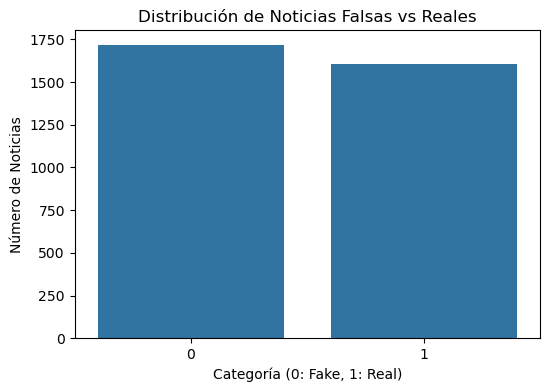

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para la distribución de categorías (Fake vs Real)
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df_combined)
plt.title('Distribución de Noticias Falsas vs Reales')
plt.xlabel('Categoría (0: Fake, 1: Real)')
plt.ylabel('Número de Noticias')
plt.show()

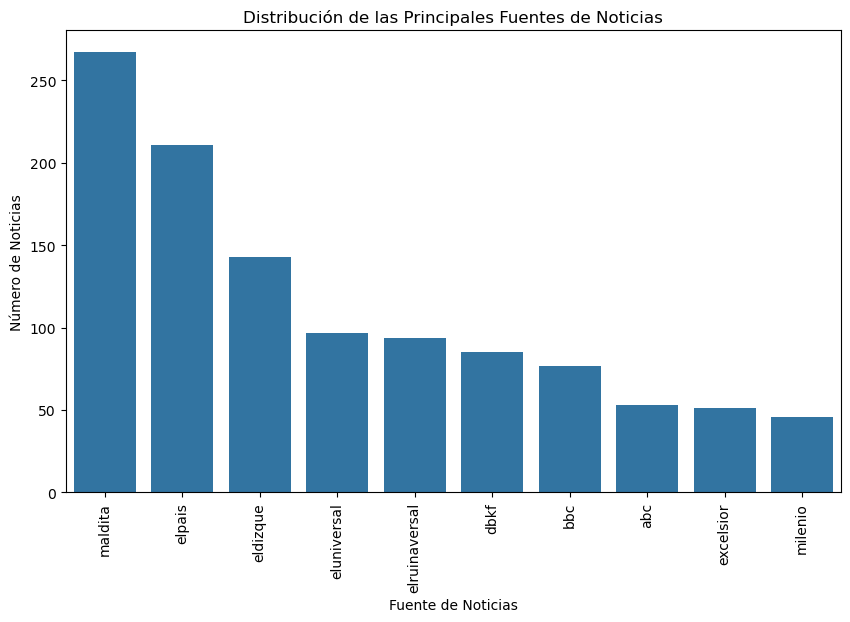

In [50]:
# Contar el número de noticias por fuente
fuente_count = df_combined['Source'].value_counts().head(10)  # Mostrar las 10 fuentes principales

# Gráfico de barras para las fuentes principales
plt.figure(figsize=(10, 6))
sns.barplot(x=fuente_count.index, y=fuente_count.values)
plt.title('Distribución de las Principales Fuentes de Noticias')
plt.xlabel('Fuente de Noticias')
plt.ylabel('Número de Noticias')
plt.xticks(rotation=90)  # Rotar las etiquetas para mayor claridad
plt.show()

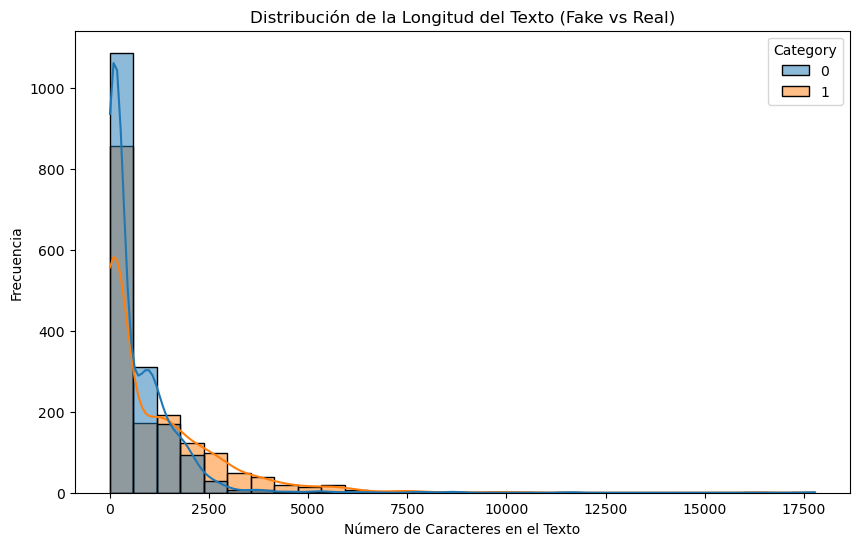

In [51]:
# Calcular la longitud del texto
df_combined['Text_Length'] = df_combined['Text'].apply(len)

# Histograma de la longitud del texto
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Text_Length', hue='Category', bins=30, kde=True)
plt.title('Distribución de la Longitud del Texto (Fake vs Real)')
plt.xlabel('Número de Caracteres en el Texto')
plt.ylabel('Frecuencia')
plt.show()



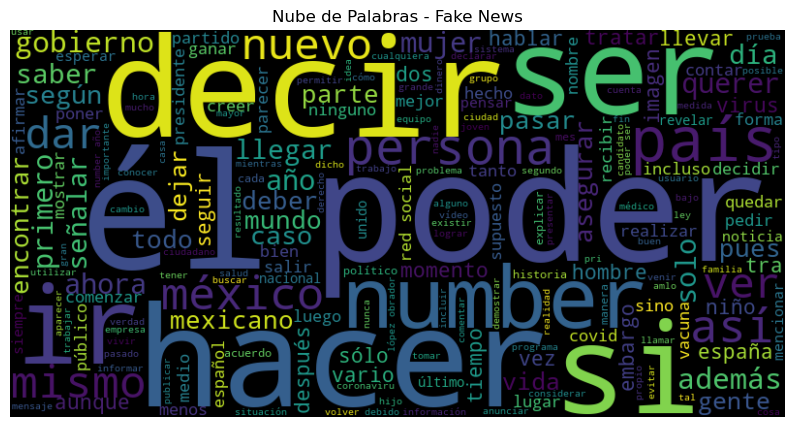

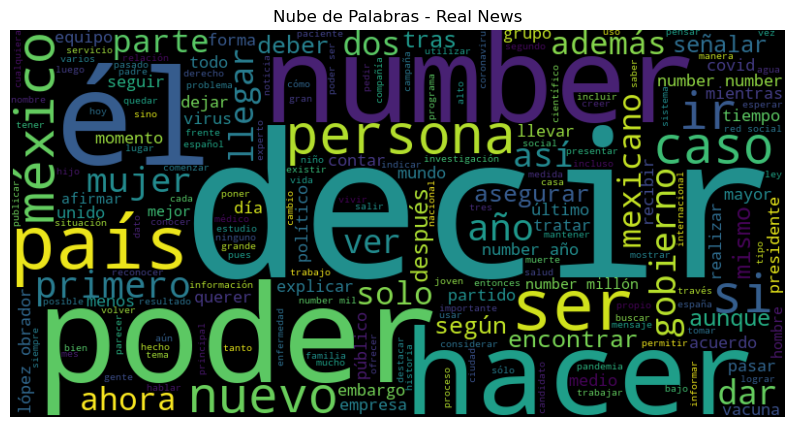

In [52]:
from wordcloud import WordCloud

# Filtrar las noticias falsas y reales
fake_news = ' '.join(df_combined[df_combined['Category'] == 0]['Text'])
real_news = ' '.join(df_combined[df_combined['Category'] == 1]['Text'])

# Generar el wordcloud para fake news
plt.figure(figsize=(10, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_news)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Nube de Palabras - Fake News')
plt.axis('off')
plt.show()

# Generar el wordcloud para real news
plt.figure(figsize=(10, 6))
wordcloud_real = WordCloud(width=800, height=400, background_color='black').generate(real_news)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Nube de Palabras - Real News')
plt.axis('off')
plt.show()
